In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

В футболе статистические функции могут представлять собой хорошо известные модели, такие как модель регрессии Пуассона или модель Диксона и Коулза.

In [40]:
bundes_22_23 = pd.read_csv("data/bundes_22-23.csv")
bundes_21_22 = pd.read_csv("data/bundes_21-22.csv")
liga_1_22_23 = pd.read_csv("data/liga_1_22-23.csv")
liga_1_21_22 = pd.read_csv("data/liga_1_21-22.csv")
Prem_Leag_22_23 = pd.read_csv("data/Prem_Leag_22-23.csv")
Prem_Leag_21_22 = pd.read_csv("data/Prem_Leag_21-22.csv")
Premiere_22_23 = pd.read_csv("data/Premiere_22-23.csv")
Premiere_21_22 = pd.read_csv("data/Premiere_21-22.csv")
bundus_2020_2021 = pd.read_csv("data_auto/bundus_2020-2021.csv")
bundus_2019_2020 = pd.read_csv("data_auto/bundus_2019-2020.csv")

In [41]:
#df_b = pd.read_csv("data/bundes_22-23.csv")
#df_l = pd.read_csv("data/table_res_math_Prem_Leag_22-23.csv")
df = pd.concat([bundes_22_23,bundes_21_22,liga_1_22_23,liga_1_21_22,Prem_Leag_22_23,Prem_Leag_21_22,Premiere_22_23,Premiere_21_22,bundus_2020_2021,bundus_2019_2020])
df = df.drop('Unnamed: 0',axis=1)
df = df[df["счет1"] != '-']
df = df.reset_index().drop(['index'], axis = 1)

In [42]:
display(df.head())



,id,общая информация,Дата,Команда1,счет1,Команда2,счет2,Температура,Признак погоды,поб1,...,Офсайды (соперник) 1,Офсайды (соперник) 2,Желтые карточки 1,Желтые карточки 2,Желтые карточки (соперник) 1,Желтые карточки (соперник) 2,Красные карточки 1,Красные карточки 2,Красные карточки (соперник) 1,Красные карточки (соперник) 2
0,1736825,"Бундеслига, 1-й тур, регулярный сезон, 05.08.2...",05.08.2022 21:35,Айнтрахт Франкфурт,1,Бавария,6,+29°C,солнечно,6.50,...,2.00,2.5,0.88,1.90,1.00,1.50,0.0,0.10,0.25,0.0
1,1736826,"Бундеслига, 1-й тур, регулярный сезон, 06.08.2...",06.08.2022 19:30,Боруссия Дортмунд,1,Байер,0,+27°C,солнечно,2.13,...,1.63,1.0,0.75,0.89,1.25,1.00,0.0,0.00,0.00,0.0
2,1736827,"Бундеслига, 1-й тур, регулярный сезон, 06.08.2...",06.08.2022 16:30,Унион Берлин,3,Герта,1,+28°C,солнечно,1.87,...,0.67,2.0,1.20,1.75,0.80,0.75,0.0,0.25,0.00,0.0
3,1736828,"Бундеслига, 1-й тур, регулярный сезон, 07.08.2...",07.08.2022 18:30,Кёльн,3,Шальке,1,+30°C,солнечно,2.08,...,1.40,2.5,2.00,0.40,1.67,0.00,0.0,0.00,0.00,0.0
4,1736829,"Бундеслига, 1-й тур, регулярный сезон, 06.08.2...",06.08.2022 16:30,Боруссия М,3,Хоффенхайм,1,+27°C,солнечно,2.07,...,2.33,2.0,0.29,2.00,0.57,1.40,0.0,0.00,0.00,0.0


In [43]:
df = df.astype({'счет1': 'int32'})
df = df.astype({'счет2': 'int32'})

df["тотал"] = df["счет1"] + df["счет2"]
df["Дата"] = pd.to_datetime(df['Дата'],dayfirst=True)
df['Температура'] = df['Температура'].apply(lambda x: int(x[1:3]))

In [44]:
fig = px.imshow(
    df.corr(),
    text_auto=True,
    height=1400,
    width=1400
)
fig.show()

In [45]:
df["Признак погоды"].value_counts()

солнечно                                                    1508
переменная облачность                                       1322
пасмурно                                                     298
ясно                                                         233
небольшой дождь                                              123
облачно                                                       43
умеренный дождь                                               38
умеренный или сильный ливневый дождь                          36
в отдельных районах умеренный или сильный дождь с грозой      15
временами умеренный дождь                                     13
дымка                                                          6
Name: Признак погоды, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              3635 non-null   int64         
 1   общая информация                3635 non-null   object        
 2   Дата                            3635 non-null   datetime64[ns]
 3   Команда1                        3635 non-null   object        
 4   счет1                           3635 non-null   int32         
 5   Команда2                        3635 non-null   object        
 6   счет2                           3635 non-null   int32         
 7   Температура                     3635 non-null   int64         
 8   Признак погоды                  3635 non-null   object        
 9   поб1                            3635 non-null   float64       
 10  X                               3635 non-null   float64       
 11  поб2

In [47]:
df['country'] = df['общая информация'].apply(lambda x: x.split()[0])
visual = pd.pivot_table(df,
                        values="тотал",
                        index="country",
                        columns="Признак погоды",
                        aggfunc='mean')
fig2 = px.imshow(visual,
                 title='Тепловая карта зависимости тотал от country и Признак погоды',
                 height=600,
                 width=800,
                 text_auto=True)
fig2.show()

In [48]:
res_tab = df.groupby('Признак погоды')['тотал'].mean().sort_values(ascending=False)
fig = px.bar(res_tab)
fig.show()

In [49]:
df["Отдых: дни (часы) 1"].value_counts()


(167) 7.0     476
(164) 6.8     100
(65) 2.7       92
(143) 6.0      90
(66) 2.8       83
             ... 
(382) 15.9      1
(319) 13.3      1
(402) 16.8      1
(365) 15.2      1
(375) 15.6      1
Name: Отдых: дни (часы) 1, Length: 246, dtype: int64

In [50]:
df['общая информация'][2000].split()[0]

'Примера,'

In [51]:
df['country'] = df['общая информация'].apply(lambda x: x.split()[0])

In [52]:
df['country'].value_counts()

Бундеслига,      1401
Премьер-Лига,     750
Лига              744
Примера,          736
Кубок               4
Name: country, dtype: int64

In [53]:
types = df.dtypes
cat_features = list(types[(types == "object")].index)
cat_features

['общая информация',
 'Команда1',
 'Команда2',
 'Признак погоды',
 'Отдых: дни (часы) 1',
 'Отдых: дни (часы) 2',
 'Победы 1',
 'Победы 2',
 'Ничьи 1',
 'Ничьи 2',
 'Поражения 1',
 'Поражения 2',
 'Сухие матчи 1',
 'Сухие матчи 2',
 'обе забьют 1',
 'обе забьют 2',
 'Тотал больше 2.5 1',
 'Тотал больше 2.5 2',
 'Тотал меньше 2.5 1',
 'Тотал меньше 2.5 2',
 'Офсайды 2',
 'Офсайды  (соперник) 2',
 'country']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13564\3496027583.py:15: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



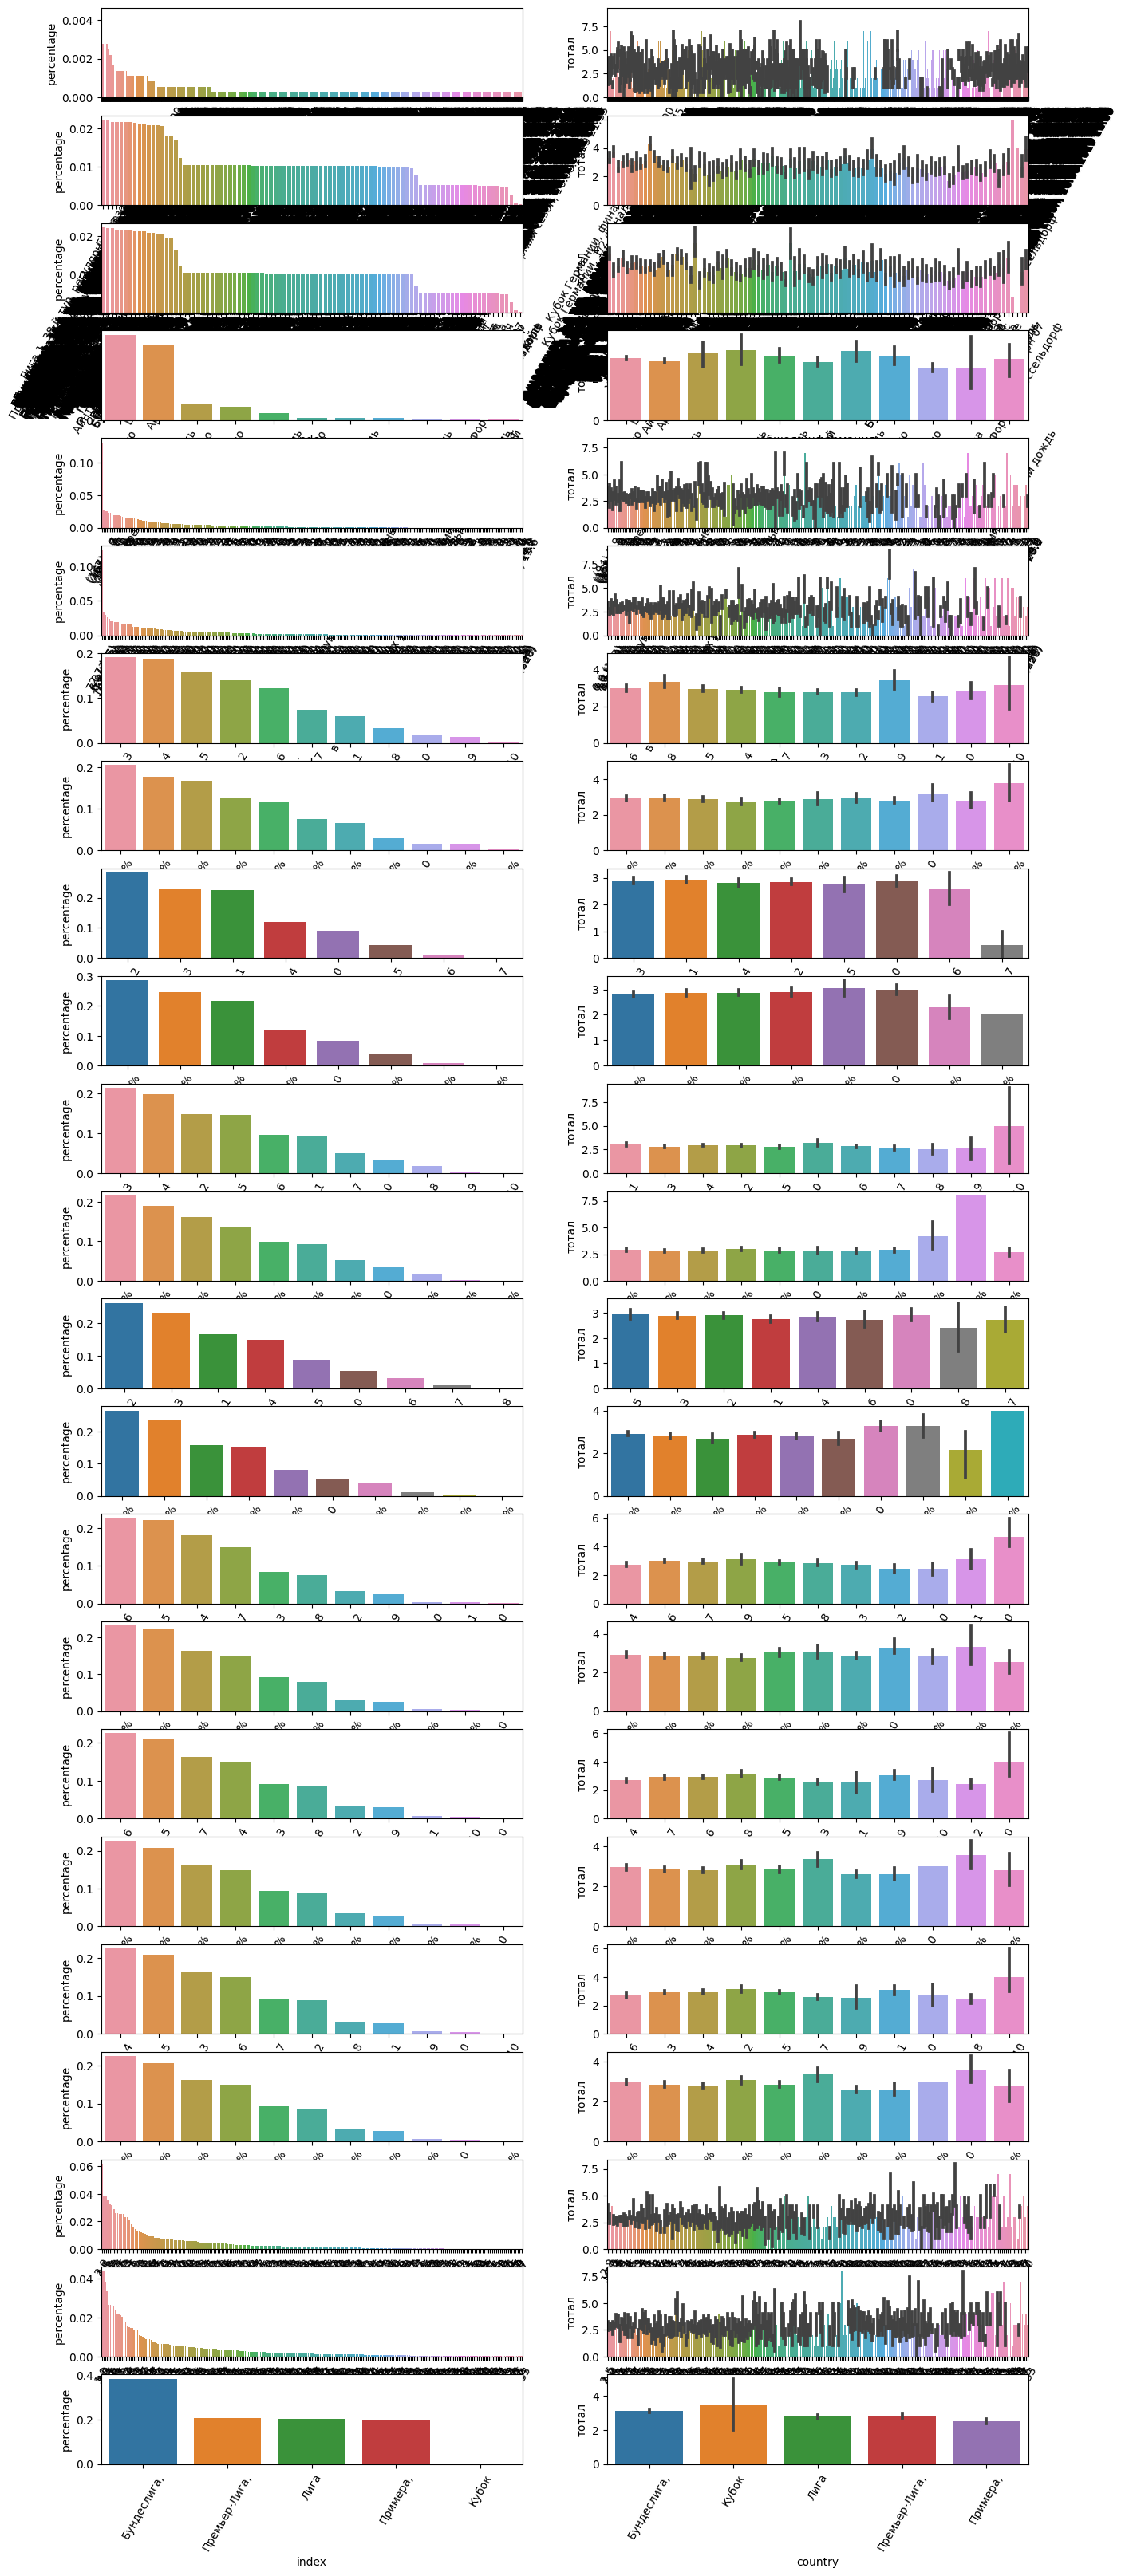

In [56]:
n = len(cat_features) #число категориальных признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 40)) #фигура+n*2 координатных плоскостей
#Создаем цикл для всех признаков из списка категориальных признаков
for i, feature in enumerate(cat_features):
    #Строим количественную столбчатую для долевого соотношения каждой из категорий в данных
    count_data = (df[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('percentage')
                  .reset_index())
    count_barplot = sns.barplot(data=count_data, x='index', y='percentage', ax=axes[i][0])
    count_barplot.xaxis.set_tick_params(rotation=60)
    #Строим столбчатую диаграмму доли людей зарабатывающих >50K (среднее по столбцу income) в зависимости от категории
    mean_barplot = sns.barplot(data=df, x=feature, y='тотал', ax=axes[i][1])
    mean_barplot.xaxis.set_tick_params(rotation=60)
plt.tight_layout() #выравнивание графиков